# Проект: Исследование рынка стартапов
Дата: 16.04.2025

### Цели и задачи проекта

Представленный дата сет с информацией о стартапах, компаниях и людях нужно:
1. Исследовать на корректность и полноту представленные исторические данные.
2. Подготовить датасет для заказчика, чтобы в дальнейшем на его основе можно было проводить анализ.
3. Ответить на некоторые вопросы заказчика для его дальнейшего входа на инвестиционный рынок.

### Описание данных

В анализе используются 5 датасетов.

1. Датасет <b>company_and_rounds</b>, содержит информацию о компаниях и раундах финансирования:

* company ID — идентификатор компании.
* name — название компании.
* category code — категория области деятельности компании.
* status — статус компании.
* founded at — дата инвестирования.
* closed at — дата закрытия компании.
* domain — официальный сайт компании.
* network username — ник компании в сети.
* country code — код страны компании.
* investment rounds — число инвестиционных раундов.
* funding rounds — число раундов финансирования.
* funding total — сумма финансирования.
* milestones — вехи финансирования.
* funding round id — идентификатор этапа финансирования.
* company id — идентификатор компании.
* funded at — дата финансирования.
* funding round type — тип финансирования.
* raised amount — сумма финансирования.
* pre money valuation — предварительная денежная оценка.
* participants — число участников.
* is first round — является ли раунд первым.
* is last round — является ли раунд последним.

2. Датасет <b>acquisition.csv</b> содержит информацию о покупках одними компаниями других компаний: 

* id — идентификатор покупки.
* acquiring_company_id — идентификатор покупающей компании.
* acquired_company_id — идентификатор покупаемой компании.
* term_code — варианты расчёта.
* price_amount — сумма сделки.
* acquired_at — дата сделки.

3. Датасет <b>people.csv</b> сдержит информацию о сотрудниках:

* id — идентификатор сотрудника.
* first_name — имя сотрудника.
* last_name — фамилия сотрудника.
* company_id — идентификатор компании.
* network_username — ник в социальных сетях.

4. Датасет <b>education.csv</b> сдержит информацию об образовании сотрудника:

* id — идентификатор записи об образовании.
* person_id — идентификатор работника.
* instituition — название учебного заведения.
* graduated_at — дата получения образования.

5. Датасет <b>degrees.csv</b> сдержит информацию о типе образования сотрудника:

* id — идентификатор записи.
* object_id — идентификатор сотрудника.
* degree_type — тип образования.
* subject — специальность.

Опциональные датасеты:
* fund.csv
* investment.csv

### Содержимое проекта

0.1. Цели и задачи проекта

0.2. Описание данных

1. Загрузка данных, знакомство с ними, первичная предобработка, смена типов

    1.1. Датафрейм acquisition.
    
    1.2. Датафйрейм company_and_rounds.
    
    1.3. Датафрейм people.
    
    1.4. Датафрейм education.
    
    1.5. Датафрейм degrees.
    
    1.6. Датафрейм fund 
    
    1.7. Датафрейм investment.
    
    1.8. Анализ пропусков и поиск дубликатов.
    
    1.9. Предварительный вывод.
    

2. Предобработка данных, предварительное исследование 
    
    2.1. Раунды финансирования по годам 
    
    2.2. Люди и их образование 
    
    2.3. Объединять или не объединять - вот в чем вопрос
    
    2.4. Проблемный датасет и причины его возникновения
    
             
3. Исследовательский анализ объединенных таблиц


4. Итоговый вывод и рекомендации

## Загрузка данных,  знакомство с ними, первичная предобработка, смена типов

Сначала загрузим необходимые для работы библиотеки:
* <b>pandas</b>  - для работы с данными,
* <b>matplotlib</b> и <b>seaborn</b> - для визуализации данных,
* <b>phik</b> - для построения матрицы корреляции. 

In [1]:
# Загружаем библиотеку Pandas
import pandas as pd

In [2]:
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Уменьшение разрешения DPI для графиков 
plt.rcParams['figure.dpi'] = 72

In [4]:
# Загружаем библиотеку numpy и настраиваем вывод числе без плавающей точки 
import numpy as np
np.set_printoptions(suppress=True, precision=3)

In [5]:
# Устанваливаем библиотеку Missingno - набор визуализаций для анализа пропусков в датафреймах
#!pip install missingno -q
#%pip install missingno -q

In [6]:
# загружаем библиотеку Missingno
import missingno as msno 

In [7]:
# Загружаем библиотеку для диаграмм Венна
#!pip install matplotlib-venn -q - это для установки, если ее нет
from matplotlib_venn import venn2, venn3 

### Датафрейм  acquisition

In [8]:
# Выгружаем данные из датасета `/datasets/acquisition.csv` в датафрейм  acquisition
try:
    #пробуем загрузить 
    acquisition = pd.read_csv('datasets/acquisition.csv')
    display('Файл "acquisition.scv" загружен в датасет "acquisition"') 
except:
    # если не получилось
    display('Ошибка при загрузке файла "acquisition.csv"')    

'Файл "acquisition.scv" загружен в датасет "acquisition"'

Познакомимся с данными датасета - выведем информацию о датафрейме методом info() и первые строки методом head()

In [9]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [10]:
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Датафрейм <b>acquisition</b> содержит <b>6</b> столбцов и <b>9407</b> строк.  
Данные похожи на заявленные и содержат информацию о покупках компаниями других компаний. Наименования столбцов соответствуют стилю snake case. 

Предварительно первичный ключ таблицы - столбец id.

<b>Изучим типы данных датафрейма 'acquisition' и их корректность</b>

<u>Строковые данные (object)</u>. **2** столбца:

1. term_code - варианты расчёта - корректно
2. acquired_at  - дата сделки - **не корректно** приведем к datetime64

<u>Целые числа (int64).</u> 4 столбца:
1. id - идентификатор покупки - корректно
2. acquiring_company_id - идентификатор покупающей компании - корректно
3. acquired_company_id - идентификатор покупаемой компании - корректно
4. price_amount — сумма сделки - **это деньги, можно перевести к float64**

In [11]:
#преобразование к дате
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], format='%Y-%m-%d')

In [12]:
acquisition['price_amount'] = acquisition['price_amount'].astype('float64')

In [13]:
acquisition.dtypes

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                   float64
acquired_at             datetime64[ns]
dtype: object

Теперь типы данных в датафрейме **acquisition** корректны.

### Датафрейм company_and_rounds

In [14]:
# Выгружаем данные из датасета `/datasets/company_and_rounds.csv` в датафрейм company
try:
    #пробуем загрузить 
    company_and_rounds = pd.read_csv('datasets/company_and_rounds.csv')
    display('Файл "company_and_rounds" загружен в датасет "company_and_rounds"')
except:
    # если не получилось
    display('Ошибка при загрузке файла')    

'Файл "company_and_rounds" загружен в датасет "company_and_rounds"'

Познакомимся с данными датасета - выведем информацию о датафрейме методом info() и первые строки методом head()

In [15]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [16]:
# Выводим первые строки датафрейма на экран
company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Датафрейм <b>company_and_rounds</b> содержит <b>22</b> столбца и <b>217774</b> строки.  
Данные соответствуют заявленным и содержат информацию о транзакциях оплаты стартапов. В данных присутствуют пропуски.

Видим, что присутствуют два дублирующихся столбца: 'company ID' и 'сompany  id'. По описанию - это одно и то же - идентификатор компании. Но один столбец 'company ID' содержит более полные данные. Можно проверить - насколько совпадают значения  в строках, где есть данные.

In [17]:
# Выделим количество строк, в которых данные по столбцам не пустые и не совпадают 
company_and_rounds.loc[(company_and_rounds['company  ID'] != company_and_rounds['company  id']) & 
                       (~company_and_rounds['company  id'].isnull()) &
                       (~company_and_rounds['company  ID'].isnull())].shape[0]

0

Все непустые строки в столбцах 'company ID' (217472 непустых строк) и 'сompany id' (52928 непустых строк) - совпадают. Поэтому, устраняя избыточность, менее заполненный столбец 'сompany id'  можно удалить, тем более, названия этих столбцов будут дублироваться, если приводлить написания столбцов к стилю snake case.

In [18]:
#удаляем столбец 'сompany id'
del company_and_rounds['company  id']

In [19]:
#проверяем - в первоначальном датафрейме было 22 столбца
display(f'Количество столбцов в датафрейме "company_and_rounds" после удаления столбца "сompany id": {company_and_rounds.shape[1]}')

'Количество столбцов в датафрейме "company_and_rounds" после удаления столбца "сompany id": 21'

In [20]:
#Приводим названия столбцов к стилю snake case. Названия - в нижнем регистре, вместо пробелов — подчёркивания.
company_and_rounds.columns = company_and_rounds.columns.str.lower().str.replace(" ","_")

In [21]:
# в именах столбцов были лишние двойные и тройные пробелы, чтобы не заморачиваться, 
# просто запускаем 2 раза преобразования подряд
company_and_rounds.columns = company_and_rounds.columns.str.replace("__","_",1)
company_and_rounds.columns = company_and_rounds.columns.str.replace("__","_",1)

In [22]:
# проверим преобразования названий столбцов
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217471 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  funded_at            52680 non-null   object 
 15  funding_round_typ

Имена столбцов приведены к стилю snake case.

In [23]:
#убираем лишние пробелы network_username 
company_and_rounds['network_username'] = company_and_rounds['network_username'].str.strip()

Перед преобразованием типов оценим пропуски

In [24]:
#Оценим пропуски в датафрейме company
(pd.DataFrame({'Кол-во пропусков': company_and_rounds.isnull().sum(), \
               'Доля пропусков':  company_and_rounds.isnull().mean()*100})      
             .sort_values(by='Кол-во пропусков', ascending=False)
             .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
closed_at,214325,98.416248
funded_at,165094,75.809784
participants,164846,75.695905
is_first_round,164846,75.695905
raised_amount,164846,75.695905
is_last_round,164846,75.695905
funding_round_type,164846,75.695905
funding_round_id,164846,75.695905
pre_money_valuation,164846,75.695905
network_username,122240,56.131586


Видим, что есть 302 строки в которых отсутствует ID компании. Доля таких строк составляет 0,1%. Посмотрим на эти данные.

In [25]:
display(company_and_rounds.loc[(company_and_rounds['company_id'].isnull())])

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_total,milestones,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
217472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,457.0,2005-01-01,series-a,48000000.0,0.0,2.0,1.0,1.0
217473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,471.0,2007-01-01,angel,300000.0,0.0,1.0,1.0,1.0
217474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,575.0,2004-09-01,angel,0.0,0.0,0.0,1.0,1.0
217475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,577.0,2007-01-01,series-a,1500000.0,2250000.0,0.0,1.0,1.0
217476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,597.0,2007-06-01,series-a,6000000.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,56454.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,56542.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,56543.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,56928.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


Скорее всего, эта проблема возникла из-за объединения первоначальных данных - есть денежные транзакции, но неизвестно к какой id компании или к какому id раунду финансирования они относятся. Удалим эти строки.

Визуализируем распределение значений NaN с помощью библиотеки Missingno

<Axes: >

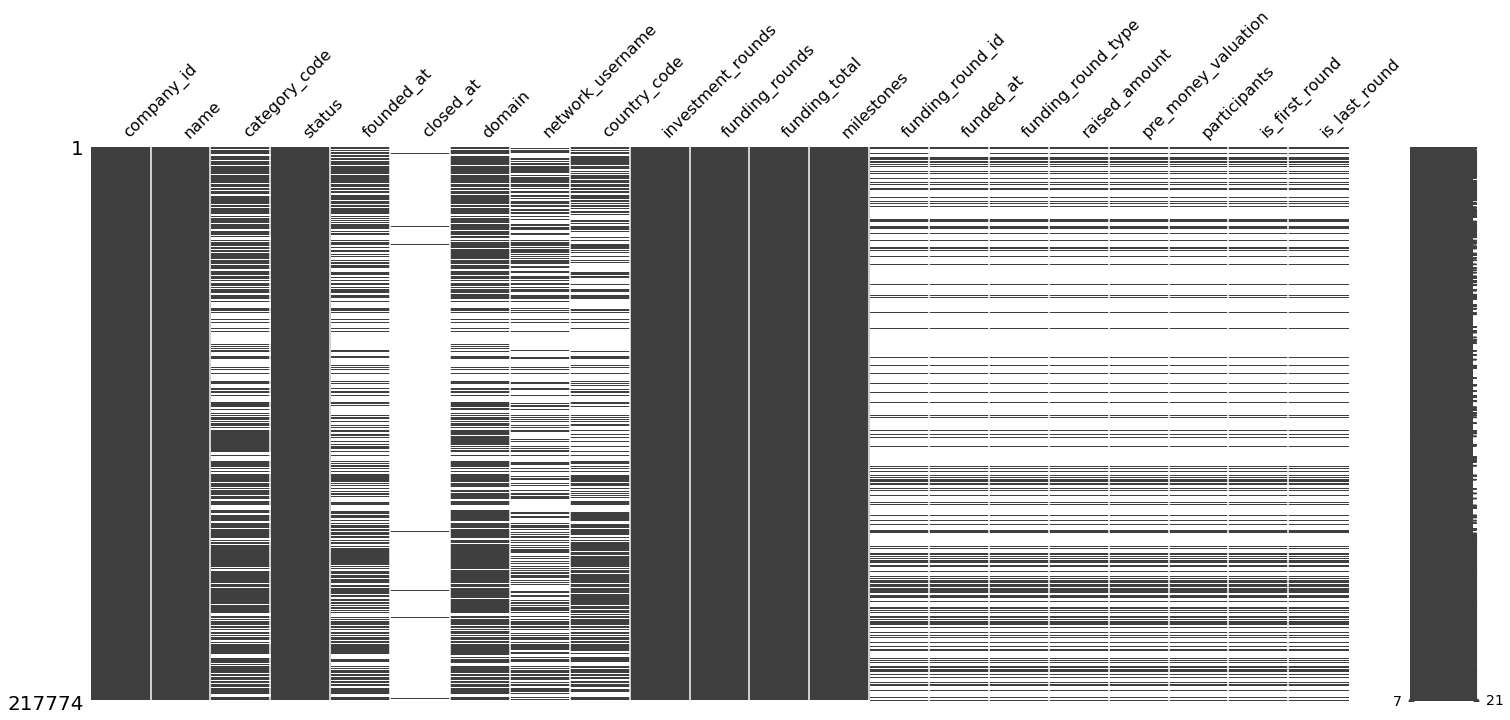

In [26]:
# строим матрицу
msno.matrix(company_and_rounds)

Корреляция пропусков и похожие закономерности отсутствия значений говорят о том, что, скорее всего, до объединения, данные хранились в 3-х датасетах.

In [27]:
# удаляем строчки с пустыми company_id
company_and_rounds = company_and_rounds.loc[~company_and_rounds['company_id'].isnull()]

In [28]:
#проверяем - в первоначальном датафрейме было 217774 строк
display(f'Количество строк в датафрейме "company_and_rounds" \
после удаления пустых строк в "company_id": {company_and_rounds.shape[0]}')

'Количество строк в датафрейме "company_and_rounds" после удаления пустых строк в "company_id": 217472'

Проверим столбец 'company_id' на уникальность.

In [29]:
display(company_and_rounds['company_id'].nunique())

196553

Видим, что количество уникальных записей с id компании меньше, чем строк. Это нормально, т.к. по каждой компании в дафрейме содержится несколько строк с раундами финансирования. 

Первичным ключом к этой таблице может считаться комбинация 'company_id'+'funding_round_id' (id компании + id раунда финансирования).

In [30]:
#проверим 
company_and_rounds.duplicated(subset=['company_id','funding_round_id']).sum()

np.int64(0)

<b>Изучим типы данных датафрейма 'company_and_rounds' и их корректность</b>

In [31]:
company_and_rounds.dtypes

company_id             float64
name                    object
category_code           object
status                  object
founded_at              object
closed_at               object
domain                  object
network_username        object
country_code            object
investment_rounds      float64
funding_rounds         float64
funding_total          float64
milestones             float64
funding_round_id       float64
funded_at               object
funding_round_type      object
raised_amount          float64
pre_money_valuation    float64
participants           float64
is_first_round         float64
is_last_round          float64
dtype: object

<u>Строковые данные (object)</u>. 10 столбцов:

1. name - название компании - корректно
2. category_code - категория области деятельности компании - корректно
3. status -  статус компании - корректно
4. founded_at -  дата инвестирования - **не корректно** - приведем к datetime64
5. closed_at - дата закрытия компании - **не корректно** - приведем к datetime64
6. domain - оф. сайт - корректно
7. network_username - ник - корректно
8. country_code - код страны компании (внитри - текст) - корректно
9. funded_at  - дата финансирования - **не корректно** - приведем к datetime64
10. funding_round_type -  тип финансирования (внитри - текст) - коорректно

<u>Числа с плавающей точкой (float64).</u> 11 столбцов:
1. company_id - идентификатор компании - **не корректно** - приведем к int64
2. investment_rounds - число инвестиционных раундов - **не корректно** -  приведем к int64
3. funding_rounds - число раундов финансирования  **не корректно** -  приведем к int64      
4. funding_total - сумма финансирования - корректно        
5. milestones - вехи финансирования - **не корректно** -  приведем к int64         
6. funding_round_id - идентификатор этапа финансирования - **не корректно** - приведем к int64
7. raised_amount - сумма финансирования  - корректно       
8. pre_money_valuation - предварительная денежная оценка - корректно
9. participants - число участников -  **не корректно** -  приведем к int64         
10. is_first_round - является ли раунд первым - **не корректно**  - приведем к bool  
11. is_last_round - является раунд последним - **не корректно**  приведем к bool      

Данные будем привеодить к нужным типам, предварительно проверяя их.

**Преобразование к дате**

In [32]:
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'], format='%Y-%m-%d')

In [33]:
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'], format='%Y-%m-%d')

In [34]:
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'], format='%Y-%m-%d')

**Преобразование к типу bool**

In [35]:
#смотрим какие значения встречаются в столбце 'is__first__round'
display(company_and_rounds['is_first_round'].sort_values().unique())

array([ 0.,  1., nan])

In [36]:
#смотрим какие значения встречаются в столбце 'is__last__round'
display(company_and_rounds['is_last_round'].sort_values().unique())

array([ 0.,  1., nan])

Смысл данных в столбцах 'is_first_round' и 'is_last_round' подразумевает ответ "да" и "нет", поэтому пустые значения в этих столбцах можно интерпретировать как "нет" и преобразовать.

In [37]:
company_and_rounds['is_first_round'] = company_and_rounds['is_first_round'].astype('bool', errors='raise')

In [38]:
company_and_rounds['is_last_round'] = company_and_rounds['is_last_round'].astype('bool', errors='raise')

**Преобразование к int64**

Прежде, чем преобразовывать типы данных в других столбцах, нужно сначала заполнить чем-то пустые значения.

In [39]:
#смотрим какие значения встречаются в столбце 'funding__round__id'
display(company_and_rounds['funding_round_id'].sort_values().unique())

array([    1.,     2.,     3., ..., 57951., 57952.,    nan])

Данные начинаются с 1, поэтому пустые значения можно заполнить 0.

In [40]:
#заполняем
company_and_rounds['funding_round_id'] = company_and_rounds['funding_round_id'].fillna(0.0)

In [41]:
#смотрим какие значения встречаются в столбце 'participants'
display(company_and_rounds['participants'].sort_values().unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 32., 36., nan])

В данных есть 0, поэтому заполним недостающие значения -1.

In [42]:
#заполняем
company_and_rounds['participants'] = company_and_rounds['participants'].fillna(-1.0)

In [43]:
# преобразовываем списком поля к типу int64
try:
    company_and_rounds[['company_id', 'investment_rounds','funding_rounds','milestones',\
                        'funding_round_id','participants']] = \
    company_and_rounds[['company_id', 'investment_rounds','funding_rounds','milestones',\
                        'funding_round_id','participants']].astype('int64', errors='raise')
    display('Преобразование к типу int64 прошло корректно')
except:
    display('Ошибка при преобразовании к типу int64')

'Преобразование к типу int64 прошло корректно'

In [44]:
company_and_rounds.dtypes

company_id                      int64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds               int64
funding_rounds                  int64
funding_total                 float64
milestones                      int64
funding_round_id                int64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                    int64
is_first_round                   bool
is_last_round                    bool
dtype: object

Теперь типы данных в датафрейме **company_and_rounds** корректны.

### Датафрейм people

In [45]:
#Выгружаем данные из датасета `/datasets/people.csv` в датафрейм people
try:
    #пробуем загрузить 
    people = pd.read_csv('datasets/people.csv')
    display('Файл "people.csv" загружен в датасет "people"')
except:
    # если не получилось
    display('Ошибка при загрузке файла "people.csv"')    

'Файл "people.csv" загружен в датасет "people"'

Познакомимся с данными датасета people - выводим информацию о датафрейме методом info() и первые строки методом head()

In [46]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [47]:
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Датафрейм <b>people</b> содержит <b>5</b> столбцов и <b>226709</b> строк.  
Данные похожи на заявленные и содержат информацию о людях, работающих в компаниях. В данных есть пропуски.
Наименования столбцов соответствуют стилю snake case.

<b>Типы данных датафрейма 'people' и их корректность</b>

<u>Строковые данные (object)</u>. 3 столбца:

1. first_name - имя сотрудника - корректно, уберем лишние пробелы, если они есть
2. last_name  - фамилия сотрудника корректно, уберем лишние пробелы, если они есть
3. network_username - ник в социальных сетях - корректно, уберем лишние пробелы, если они есть

<u>Целые числа (int64).</u> 1 столбец:
1. id - идентификатор сотрудника - корректно

<u>Вещественные числа (float64).</u> 1 столбец:
1. company_id  - идентификатор компании - **не корректно** - перобразуем к int64

In [48]:
#переименуем столбец id в people_id для удобства
people = people.rename(columns={'id':'people_id'})

In [49]:
#убираем лишние пробелы в фамилии, имени, нике
people['first_name'] = people['first_name'].str.strip()
people['last_name'] = people['last_name'].str.strip()
people['network_username'] = people['network_username'].str.strip()

In [50]:
people.head()

,people_id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Прежде, чем преобразовывать, нужно сначала заполнить чем-то пустые значения.

In [51]:
#смотрим какие значения встречаются в столбце ''
display(people['company_id'].sort_values().unique())

array([     1.,      2.,      3., ..., 285996., 286091.,     nan])

Данные начинаются с 1, поэтому пустые значеения можно заполнить 0.

In [52]:
#заполняем
people['company_id'] = people['company_id'].fillna(0.0)

In [53]:
try:
    people['company_id'] = people['company_id'].astype('int64', errors='raise')
    display('Преобразование к типу int64 прошло корректно')
except:
    display('Ошибка при преобразовании к типу int64')

'Преобразование к типу int64 прошло корректно'

In [54]:
people.dtypes

people_id            int64
first_name          object
last_name           object
company_id           int64
network_username    object
dtype: object

Теперь типы данных в датафрейме people - корректны

### Датафрейм education

In [55]:
#Выгружаем данные из датасета `/datasets/education.csv` в датафрейм people
try:
    #пробуем загрузить 
    education = pd.read_csv('datasets/education.csv')
    display('Файл "education.csv" загружен в датасет "education"')
except:
    # если не получилось
    display('Ошибка при загрузке файла "education.csv"')    

'Файл "education.csv" загружен в датасет "education"'

In [56]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [57]:
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Датафрейм <b>education</b> содержит <b>4</b> столбца и <b>109610</b> строк.  
Данные похожи на заявленные и содержат информацию об образовании людей. В данных есть пропуски.
Наименования столбцов соответствуют стилю snake case.

<b>Типы данных датафрейма 'education' и их корректность</b>

<u>Строковые данные (object)</u>. 2 столбца:

1. instituition - название учебного заведения - корректно, уберем лишние пробелы
2. graduated_at  - дата получения образования -  **не корректно** - там находится 1 января года окончания обучения - удобно привести не datetime64, а к int64

<u>Целые числа (int64).</u> 1 столбец:
1. id - идентификатор записи об образовании - корректно
2. person_id — идентификатор работника - корректно

In [58]:
#переименуем столбец person_id в people_id для удобства
education = education.rename(columns={'person_id':'people_id'})

In [59]:
#убираем лишние пробелы в названии ВУЗа
education['instituition'] = education['instituition'].str.strip()

In [60]:
#выбираем год - первые 4 символа строки
education['graduated_at'] = education['graduated_at'].str[0:4]

In [61]:
#Заполним пропуски нулями
education['graduated_at'] = education['graduated_at'].fillna('0')

In [62]:
#преобразуем к типу int64
education['graduated_at'] = education['graduated_at'].astype('int64', errors='raise')

In [63]:
education.dtypes

id               int64
people_id        int64
instituition    object
graduated_at     int64
dtype: object

Теперь типы данных в датафрейме edu - корректны.

### Датафрейм degrees

In [64]:
#Выгружаем данные из датасета `/datasets/degrees.csv` в датафрейм degrees
try:
    #пробуем загрузить 
    degrees = pd.read_csv('datasets/degrees.csv')
    display('Файл "degrees.csv" загружен в датасет "degrees"')
except:
    # если не получилось
    display('Ошибка при загрузке файла "degrees.csv"')    

'Файл "degrees.csv" загружен в датасет "degrees"'

In [65]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [66]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Датафрейм <b>degrees</b> содержит <b>4</b> столбца и <b>109610</b> строк.  
Данные похожи на заявленные и содержат информацию о типе образовании людей. В данных есть пропуски.
Наименования столбцов соответствуют стилю snake case.

<b>Типы данных датафрейма 'degrees' и их корректность</b>

<u>Строковые данные (object)</u>. 3 столбца:

1. object_id - идентификатор сотрудника - **некорректно** - уберем символы "p:" и преобразуем к int64
2. degree_type — тип образования - корректно
3. subject — специальность - корректно

<u>Целые числа (int64).</u> 1 столбец:
1. id - идентификатор записи о типе образовании - корректно

In [67]:
#переименуем столбец object_id в people_id для удобства
degrees = degrees.rename(columns={'object_id':'people_id'})

In [68]:
#убираем символы "p:" из значений столбца
degrees['people_id'] = degrees['people_id'].str.replace('p:','')

In [69]:
#проверяем  все ли строки в столбце people_id - цифры
degrees['people_id'].str.isdigit().sum()

np.int64(109610)

Все строки в столбце 'people_id' содержат цифры. Значит, можно преобразовать к int64.

In [70]:
try:
    degrees['people_id'] = degrees['people_id'].astype('int64', errors='raise')
    display('Преобразование к типу int64 прошло корректно')
except:
    display('Ошибка при преобразовании к типу int64')

'Преобразование к типу int64 прошло корректно'

In [71]:
degrees.dtypes

id              int64
people_id       int64
degree_type    object
subject        object
dtype: object

Типы данных в датафрейме degrees - корректны.

### Датафрейм fund

In [72]:
#Выгружаем данные из датасета `/datasets/fund.csv` в датафрейм fund
try:
    #пробуем загрузить 
    fund = pd.read_csv('datasets/fund.csv')
    display('Файл "fund.csv" загружен в датасет "fund"')
except:
    # если не получилось
    display('Ошибка при загрузке файла "fund.csv"')    

'Файл "fund.csv" загружен в датасет "fund"'

In [73]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [74]:
fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


Датафрейм <b>fund</b> содержит <b>9</b> столбцов и <b>11652</b> строки.  
Данные похожи на заявленные и содержат информацию о финансовых фондах. В данных есть пропуски.
Наименования столбцов соответствуют стилю snake case.

### Датафрейм investment

In [75]:
#Выгружаем данные из датасета `/datasets/investment.csv` в датафрейм investment
try:
    #пробуем загрузить 
    investment = pd.read_csv('datasets/investment.csv')
    display('Файл "investment.csv" загружен в датасет "investment"')
except:
    # если не получилось
    display('Ошибка при загрузке файла "investment.csv"')    

'Файл "investment.csv" загружен в датасет "investment"'

In [76]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [77]:
investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


Датафрейм <b>investment</b> содержит <b>4</b> столбца и <b>61403</b> строки.  
Данные - числовые и похожи на заявленные. В данных пропусков нет.
Наименования столбцов соответствуют стилю snake case.

### Анализ пропусков и поиск дубликатов

- Обработаем типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оценим полноту данных — сделаем предварительный вывод, достаточно ли данных для решения задач проекта.

#### Датафрейм acquisition

Оценим на уникальность столбец 'id'.

In [78]:
display(acquisition['id'].nunique())

9407

На 9407 строк - 9407 уникальных значений. Значит, столбец 'id' - первичный ключ acquisition и дубликатов строк в датафрейме - нет.

In [79]:
#Оценим пропуски в датафрейме acquisition
(pd.DataFrame({'Кол-во пропусков': acquisition.isnull().sum(), 'Доля пропусков':  acquisition.isnull().mean()*100})      
             .sort_values(by='Кол-во пропусков', ascending=False)
             .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
term_code,7576,80.535771
acquired_at,29,0.308281
acquiring_company_id,0,0.000000
id,0,0.000000
acquired_company_id,0,0.000000
price_amount,0,0.000000


Пропуски в столбцах term_code — варианты расчёта и acquired_at — дата сделки

In [80]:
#проверим на дубли
display(f'Явных дубликатов по всем столбцам: {acquisition.duplicated().sum()}.\
        Это {acquisition.duplicated().sum()/acquisition.shape[0]} %')

'Явных дубликатов по всем столбцам: 0.        Это 0.0 %'

#### Датафрейм company_and_rounds

In [81]:
#Оценим пропуски в датафрейме company
(pd.DataFrame({'Кол-во пропусков': company_and_rounds.isnull().sum(),\
               'Доля пропусков':  company_and_rounds.isnull().mean()*100})      
             .sort_values(by='Кол-во пропусков', ascending=False)
             .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
closed_at,214023,98.414049
funded_at,165090,75.913221
funding_round_type,164846,75.801023
raised_amount,164846,75.801023
pre_money_valuation,164846,75.801023
network_username,121938,56.070667
country_code,108865,50.059318
founded_at,107516,49.439008
category_code,73586,33.837000
domain,70313,32.331978


Оценим корреляцию пропусков между столбцами по тепловой карте

<Axes: >

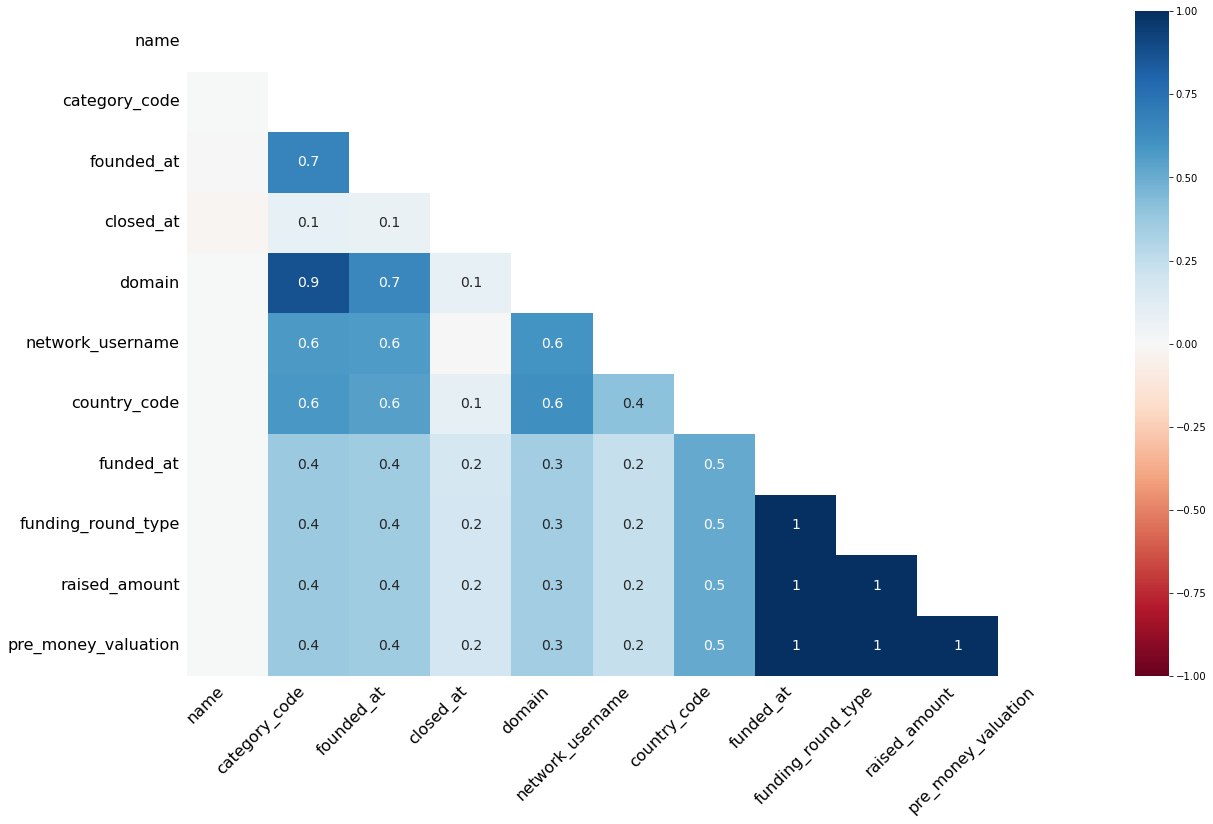

In [82]:
# строим тепловую карту
msno.heatmap(company_and_rounds)

Наблюдается прямая зависимость (=1) в столбцах, касающихся финансовых раундов - id раунда, дата финансирования, тип финансирования, сумма, предварительная денежная оценка, число участников. Это поможет в дальнейшем при разбиении на отлельные датафреймы.

In [83]:
#проверим на дубли
display(f'Явных дубликатов по всем столбцам: {company_and_rounds.duplicated().sum()}.\
        Это {company_and_rounds.duplicated().sum()/company_and_rounds.shape[0]} %')

'Явных дубликатов по всем столбцам: 0.        Это 0.0 %'

In [84]:
#ищу опечатку в имени
display(company_and_rounds.loc[company_and_rounds['name'].str.find('NaN') != -1])

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_total,milestones,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
6492,137018,NaN,NaN,closed,2009-01-01,2010-07-01,NaN,NaN,NaN,0,...,0.0,1,0,NaT,NaN,NaN,NaN,-1,True,True
16866,151184,NaNaija,NaN,operating,NaT,NaT,NaN,NaN,NaN,0,...,0.0,0,0,NaT,NaN,NaN,NaN,-1,True,True


In [85]:
#убираем 
company_and_rounds = company_and_rounds.loc[company_and_rounds['name'].str.find('NaN') == -1]

In [86]:
 display(f'После удаления в датафрейме "company_and_rounds" {company_and_rounds.shape[0]} строк')

'После удаления в датафрейме "company_and_rounds" 217470 строк'

#### Датафрейм people

Проверим на уникальность столбец 'people_id'

In [87]:
display(people['people_id'].nunique())

226708

На 226709 строк 226708 значений. Где-то 1 человек дублируется. Посмотрим на полные дубликаты.

In [88]:
#Проверим на наличие явных дубликатов в данных по всем столбцам
display(f'Явных дубликатов по всем столбцам: {people.duplicated().sum()}.\
        Это {people.duplicated().sum()/people.shape[0]} %')

'Явных дубликатов по всем столбцам: 0.        Это 0.0 %'

Проверим на дубликаты id-имя-фамилия.

In [89]:
display(people.duplicated(subset=['people_id','first_name','last_name']).sum())

np.int64(1)

Есть 1 человек. Проверим - вдруг он работает в разных компаниях? Такое тоже возможно.

In [90]:
display(people.duplicated(subset=['people_id','first_name','last_name', 'company_id']).sum())

np.int64(0)

Да, похоже, что 1 человек работает в 2-х разных компаниях. Убедимся в этом.

In [91]:
#Найдем его id
people.loc[people.duplicated(subset=['people_id','first_name','last_name'])]


,people_id,first_name,last_name,company_id,network_username
13172,116554,Nicole,Couto,212993,NaN


In [92]:
#выведем все строки с таким id
display(people.loc[people['people_id'] ==116554])

,people_id,first_name,last_name,company_id,network_username
13171,116554,Nicole,Couto,200243,NaN
13172,116554,Nicole,Couto,212993,NaN


Да, человек работает в разных компаниях. Значит, первичный ключ к таблице people - это не 'people_id', а комбинация 'people_id'+'company_id'.

In [93]:
#Оценим пропуски в датафрейме people
(pd.DataFrame({'Кол-во пропусков': people.isnull().sum(), 'Доля пропусков':  people.isnull().mean()*100})      
             .sort_values(by='Кол-во пропусков', ascending=False)
             .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
network_username,187842,82.855996
first_name,9,0.003970
last_name,4,0.001764
people_id,0,0.000000
company_id,0,0.000000


Пропуски в таблице people на анализ не влияют.

#### Датафрейм education

Проверим на уникальность столбец 'id'

In [94]:
display(education['id'].nunique())

109610

На 109610 строк 109610 уникальных значений. Значит, 'id' - первичный ключ к таблице education.

In [95]:
#Проверим на полные дубликаты 
display(education.duplicated().sum())

np.int64(0)

Проверим на дубликаты об образовании человека -id+ВУЗ+дата получения образования

In [96]:
display(education.duplicated(subset=['people_id','instituition','graduated_at']).sum())

np.int64(4138)

Видим, что есть дубликаты. Теоретически, человек может учиться в одном ВУзе и получать несколько специальностей одновременно. Но практически, таких случаев единицы, удалим эти дубликаты.

In [97]:
education = education.drop_duplicates(subset=['people_id','instituition','graduated_at'], keep='first', inplace=False) 

In [98]:
#Оценим дубликаты по человеку
display(education.duplicated(subset=['people_id']).sum())

np.int64(37021)

Видим, что по человеку может быть несколько записей об образовании. Это будем иметь в виду при дальнейшей обработке.

In [99]:
#Оценим пропуски в датафрейме education
(pd.DataFrame({'Кол-во пропусков': education.isnull().sum(), 'Доля пропусков':  education.isnull().mean()*100})      
             .sort_values(by='Кол-во пропусков', ascending=False)
             .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
instituition,53,0.050250
id,0,0.000000
people_id,0,0.000000
graduated_at,0,0.000000


Пропуски в таблице education встречаются только в названии учебного заведения. Это можно учитывать в дальнейшем анализе, если понадобится.

In [100]:
education.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105472 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            105472 non-null  int64 
 1   people_id     105472 non-null  int64 
 2   instituition  105419 non-null  object
 3   graduated_at  105472 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.0+ MB


#### Датафрейм degrees

Проверим на уникальность столбец 'id'

In [101]:
display(degrees['id'].nunique())

109610

на 109610 строк 109610 уникальных значений. Значит, 'id' - первичный ключ к таблице degrees.

Проверим на дубликаты о типе образования человека -id человека+тип образования + специальность

In [102]:
display(degrees.duplicated(subset=['people_id','degree_type','subject']).sum())

np.int64(1914)

Теоретически, человек по своей или по другой специальности может учиться несколько раз, но больше никакой информации нет, поэтому удалим эти дубликаты.

In [103]:
degrees = degrees.drop_duplicates(subset=['people_id','degree_type','subject'], keep='first', inplace=False) 

In [104]:
#Оценим пропуски в датафрейме degrees
(pd.DataFrame({'Кол-во пропусков': degrees.isnull().sum(), 'Доля пропусков':  degrees.isnull().mean()*100})      
             .sort_values(by='Кол-во пропусков', ascending=False)
             .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
subject,26935,25.010214
degree_type,9992,9.277968
people_id,0,0.000000
id,0,0.000000


In [105]:
#посчитаем количество записей с пустыми столбцами 'subject' и 'degree_type'
degrees.loc[(degrees['degree_type'].isnull()) & (degrees['subject'].isnull())].shape[0]

4986

Эти записи смысловую нагрузку не несут, поэтому удалим.

In [106]:
# удаляем, выбирая записи, где заполнен хотя бы один из столбцов
degrees = degrees.loc[(~degrees['degree_type'].isnull()) | (~degrees['subject'].isnull())]

In [107]:
#проверим на явные дубликаты по всем строкам
display(degrees.duplicated().sum())

np.int64(0)

#### Датафрейм fund

Проверим на пропуски датафрейм fund

In [108]:
#Оценим пропуски в датафрейме degrees
(pd.DataFrame({'Кол-во пропусков': fund.isnull().sum(), 'Доля пропусков':  fund.isnull().mean()*100})      
             .sort_values(by='Кол-во пропусков', ascending=False)
             .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
network_username,9503,81.556814
founded_at,7047,60.478888
country_code,4599,39.469619
domain,4290,36.817714
name,3,0.025747
id,0,0.000000
investment_rounds,0,0.000000
invested_companies,0,0.000000
milestones,0,0.000000


Видим 2 пустые строки с названием фонда, помотрим на них.

In [109]:
display(fund.loc[fund['name'].isnull()])

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
4251,14856,NaN,NaN,NaN,NaN,NaN,0,0,0
11380,9660,NaN,NaN,NaN,NaN,NaN,0,0,0


Других данных тоже нет - можно удалить, удаляем.

In [110]:
fund = fund.dropna(subset=['name'])

In [111]:
display(f'После уделения в датафрейме "fund" {fund.shape[0]} строк')

'После уделения в датафрейме "fund" 11649 строк'

In [112]:
display(fund.loc[fund['name'].str.find('NaN') != -1])

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones


In [113]:
#проверим на явные дубликаты по всем строкам
display(fund.duplicated().sum())

np.int64(0)

#### Датафрейм investment

В данных пропусков нет - это мы выяснили выше.

In [114]:
#проверим на явные дубликаты по всем строкам
display(investment.duplicated().sum())

np.int64(0)

### Предварительные выводы

В датафрейме  **acquisition** на этапе предобработки проделана следующая работа:
    
- Преобразованы типы данных:
   - Столбец 'acquired_at' преобразован тип datetime64
   - Столбец 'price_amount' преобразован в тип float64
- Столбец 'id' проверен на уникальность.
- Датафрейм проверен на явные дубликаты по всем строкам.
- Датафрейм содержит 9407 строк и 6 столбцов
- Первичным ключом к записям является 'id'
   
В датафрейме  **company_and_rounds** на этапе предобработки проделана следующая работа:
    
- Удален дублированный столбец 'company id'
- Наименоания столбцов приведены к стилю snake case
- Удалены 302 (0,14%) строки с пустыми значениями 'company_id'
- Преобразованы типы данных:
     - founded_at преобразован к datetime64
     - closed_at  преобразован к datetime64
     - funded_at  преобразован к datetime64
     - company_id преобразован к int64
     - investment_rounds преобразован к int64
     - funding_rounds преобразован к int64
     - milestones преобразован к int64
     - funding_round_id преобразован к int64
     - participants - преобразован к int64
     - is_first_round - преобразован к bool пустые значения заполнены False
     - is_last_round - преобразован к bool, пустые значения заполнены False
- Убраны лишние пробелы слева и справа в столбце 'network_username'.     
- Датафрейм проверен на явные дубликаты по всем строкам.
- Удалена 1 строка пустая строка с опечаткой NaN в имени - 0,0005% 
- Датафрейм содержит 217472 строк и 22 столбца.
- Первичным ключом к записям является комбинация 'company_id'+'funding_round_id'

В датафрейме  **people** на этапе предобработки проделана следующая работа:
    
- Преобразованы типы данных:
     - company_id - перобразован к int64, пустые значения заполнены 0
- Cтолбец 'id' переименован в 'people_id'
- Убраны лишние пробелы слева и справа в столбцах 'first_name', 'last_name', 'network_username'.
- Датафрейм проверен на явные дубликаты по всем строкам.
- Датафрейм содержит 226709 строк и 5 столбцов.
- Первичным ключом к записям является комбинация 'people_id'+'company_id'.

В датафрейме  **education** на этапе предобработки проделана следующая работа:
    
- Преобразованы типы данных:
    - graduated_at - преобразовано к int64
- Cтолбец 'person_id' переименован в 'people_id'    
- Столбец 'id' проверен на уникальность
- Датафрейм проверен на явные дубликаты по всем строкам и неявные дубликаты по столбцам человек-ВУЗ-год окончания, 
    удалены 4138 (3,78%) дублированных записей
- Датафрейм содержит 105472 строк и 4 столбца.
- Первичным ключом к записям является 'id'

В датафрейме  **degrees** на этапе предобработки проделана следующая работа:
    
- Преобразованы типы данных:
    - object_id - убран символ "p:"  преобразовано к int64
- Cтолбец 'object_id' переименован в 'people_id'    
- Столбец 'id' проверен на уникальность
- Датафрейм проверен на неявные дубликаты 
    - по столбцам челове-тип образования-предмет - удалены 1914 (1,7%) записей.
- Удалены строки с пустыми значениями по человеку тип образования + предмет - 4986 (4,5%) записей.
- Датафрейм проверен на явные дубликаты по всем строкам.
- Датафрейм содержит 102710 строк и 4 столбца.
- Первичным ключом к записям является 'id'

В датафрейме  **fund** на этапе предобработки проделана следующая работа:

- Удалены 2 пустые записи (0,02%).
- Датафрейм проверен на явные дубликаты по всем строкам.
- Датафрейм содержит 11650 строк и 9 столбцов.
- Первичным ключом к записям является 'id'

Датафрейм  **investment** загружен и содержит 61403 строки и 4 столбца.
- пропусков и явных дубликатов по всем строкам - нет

## Предобработка данных, предварительное исследование


### Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

Т.к. в датафрейме company_and_rounds в столбце funding_round_id было много пустых значений, которые мы заполнили нулями, проверим: есть ли строчки с id раунда финансирования = 0 и непустой суммой этого раунда инвестирования.

In [115]:
#проверяем
display(company_and_rounds.loc[ (company_and_rounds['funding_round_id']==0) & (company_and_rounds['raised_amount']==0)])

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_total,milestones,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round


Таких записей нет. Поэтому можно убрать строчки с пустыми 'funding_round_id' из анализа.

In [116]:
grouped=company_and_rounds.loc[company_and_rounds['funding_round_id']!=0]

In [117]:
grouped.shape[0]

52626

Проверяем как соотносятся данные с датафреймом investment (раунды финансирования). В investment - 61403 раундов, в company_and_rounds -  52626 раундов. Похоже на правду.

In [118]:
#составляем сводную таблицу
round_years=pd.pivot_table(grouped, index=[company_and_rounds['funded_at'].dt.year], \
                           values=['raised_amount'], aggfunc=['median','mean','count'])

In [119]:
#Сбрасываем индекс
round_years=round_years.reset_index()

In [120]:
#переименовываем столбцы для наглядности
round_years.columns = ['Год', 'Сумма_раунда', 'Ср_сумма_раунда','N_раундов']

In [121]:
#Оставлем в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования
round_years=round_years.loc[round_years['N_раундов']>50]

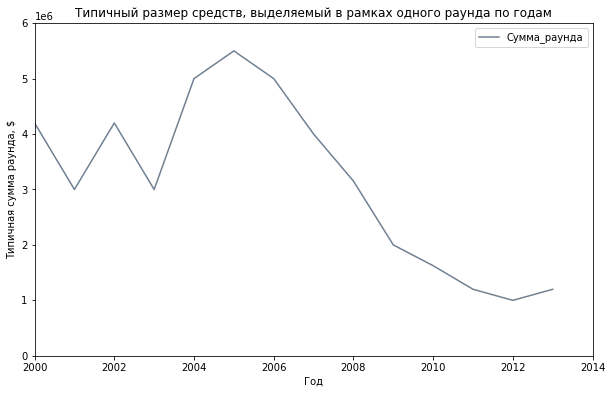

In [122]:
#строим график. Для отражения данных, изменяемых во времени, подходит линейчатый график
round_years.plot(kind='line',
                 x='Год',
                 y='Сумма_раунда',
                 xlim=[2000,2014],
                 ylim=[0,6000000],
                 title='Типичный размер средств, выделяемый в рамках одного раунда по годам',
                 legend=True,
                 ylabel='Типичная сумма раунда, $',
                 xlabel='Год',
                 color='slategray',
                 figsize=(10, 6),
                 rot=0)
plt.show()

Типичный размер, собранных в рамках одного раунда средств, был максимален в 2005 году.

In [123]:
display(round_years.loc[round_years['Год']==2005])

,Год,Сумма_раунда,Ср_сумма_раунда,N_раундов
21,2005.0,5500000.0,9.167379e+06,1624


In [124]:
display(round_years.loc[round_years['Год']==2013])

,Год,Сумма_раунда,Ср_сумма_раунда,N_раундов
29,2013.0,1200000.0,8.123522e+06,11042


В 2013 году наметился рост суммы, выделенной в рамказ 1 раунда, после минимума в 2012 году. В 2013 году было 11042 платежей, типичная сумма раунда (медиана) - 1200000.  

### Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Объединим people и education по столбцу 'people_id' и типу 'left'.

In [125]:
#объединяем
people_edu=pd.merge(left=people, right=education, how='left', on='people_id')

В задании нужно оценить сотрудников, работающих в компаниях, но мы видим пустые значения в столбце 'company_id'. Ограничим выборку, отбросив сотрудников, у которых компания не указана.

In [126]:
people_edu = people_edu.loc[people_edu['company_id'] != 0]

In [127]:
#количество оставшихся строк
people_edu.shape[0]

43860

У некоторых людей дублируются данные - это или два разных образования, или один университет, но разные годы. Иногда университеты немного по-разному написаны, что тоже теоретически возможно - например, разные колледжи в одном университете.

Нас интересует в принципе - есть у человека образование или нет. Можно поступить таким образом - добавиить столбец типа 'bool', который будет обозначать - есть у человека образование или нет. Будем считать, что наличие Университета и года окончания обучения говорит о наличии образования.

In [128]:
#Добавляем столбец
people_edu.insert(4,'education', False)

In [129]:
#если непустые значения института или года окончания обучения - ставим наличие образования 
people_edu.loc[(~people_edu['instituition'].isnull()) | \
               (~people_edu['graduated_at'].isnull()),'education'] = True

In [130]:
#выберем записи - компания-человек-образование
unique_values = people_edu[['company_id', 'people_id','education']].drop_duplicates()

In [131]:
#сгруппируем по компании и посчитаем статистику по каждой компании
company_stat = unique_values.groupby('company_id').agg({'people_id':'count',\
                                                        'education':'sum'})

In [132]:
#сбрасываем индекс
company_stat = company_stat.reset_index()

In [133]:
#переименуем столбец 'people_id' 'people'
company_stat = company_stat.rename(columns={'people_id' : 'people'})

In [134]:
#добавляем столбец, в котором будет информация о количестве сотрудников без образования
company_stat['no_education'] = pd.Series(dtype='int64')

In [135]:
#вычисляем количество людей без образования по каждой компании
company_stat['no_education'] = company_stat['people'] -  company_stat['education']

In [136]:
#добавляем столбец - доля сотрудников без образования
company_stat['part_no_education'] = pd.Series(dtype='float64')

In [137]:
#вычисляем долю сотрудников без образования
company_stat['part_no_education'] = round((company_stat['no_education']/company_stat['people'])*100,2)

Выведем статистику по столбцу 'people', чтобы оценить как группируются данные и можно ли разбить компании по количеству по процентилям?

In [138]:
company_stat['people'].describe()

count    22922.000000
mean         1.510121
std          2.764321
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        244.000000
Name: people, dtype: float64

Видим, что распределение количества сотрудников сильно скошено влево  - до 75% компаний имеют в штате 1 сотрудника. Остальные числа настолько малы, что на гистограмме распределения этих значений не видно. 

In [139]:
#посмотрим на частоту встречающегося значения "количество сотрудников" 
company_stat['people'].value_counts()

people
1      18117
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
11        30
10        25
13        17
12        16
14         8
17         5
16         4
15         3
20         3
18         3
19         3
23         3
25         2
56         2
29         2
21         2
22         2
61         1
51         1
48         1
26         1
39         1
150        1
244        1
63         1
36         1
138        1
47         1
32         1
35         1
31         1
72         1
Name: count, dtype: int64

Text(0.5, 1.0, 'Частота встречающихся значений "Количество сотрудников компании"')

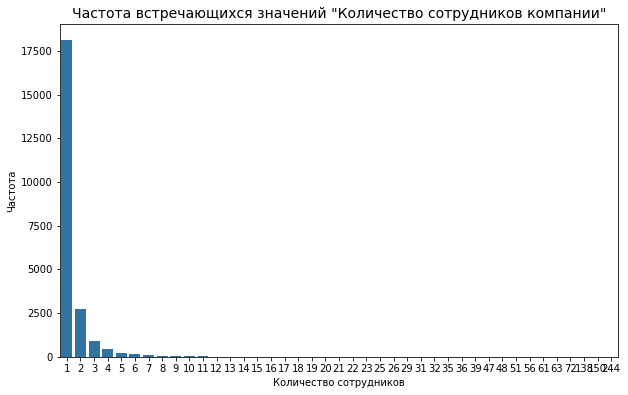

In [140]:
#Визуализируем - построим диаграмму countplot на одной переменной как категориальной в порядковых позициях.
figure, chart = plt.subplots(figsize=(10, 6))
sns.countplot(x=company_stat['people'],data=company_stat)
chart.set_xlabel('Количество сотрудников')
chart.set_ylabel('Частота')
chart.set_title('Частота встречающихся значений "Количество сотрудников компании"', fontsize = 14)

Возникает вопрос: на сколько корзин (категорий) делить компании при таком неравномерном распределении? 
Существует формула Стерджесса, по ней получается 15 корзин, но она применима только для нормального расперделения, а у нас ассиметричное.

Если мы стремимся, чтобы в каждой корзине было сопоставимое количество примеров, то если смотреть на график, видимых значимых столбцов - 4 и +1 - все, что справа.
Разделим на 5 категорий:
1. компании с 1 сотрудником (таких 18117)  
2. компании с 2-мя сотрудниками (таких - 2709) 
3. компании с 3-мя (921)
4. компании с 4-мя и более (450) 
5. компании с 5-ю и более (725) 

In [141]:
#Разделим компании (верхняя граница корзин - включается, нижняя - нет)
company_stat['group_people'] = pd.cut(company_stat['people'],\
                                            bins=[0, 1, 2, 3, 4, float('inf') ],\
                                            labels=["1", "2", "3", "4","5"])

Сгруппируем по типу компании и узнаем процент работающих людей без образования.

In [142]:
gr=round((company_stat.groupby('group_people',observed=False)['no_education'].sum()\
          /company_stat.groupby('group_people', observed=False)['people'].sum())*100,2)

In [143]:
display('Доля сотрудников без образования по категориям компаний')
gr.head(10)

'Доля сотрудников без образования по категориям компаний'

group_people
1    46.26
2    46.60
3    48.68
4    48.50
5    46.45
dtype: float64

In [144]:
#сгруппируем для построения графика
gr =company_stat.groupby('group_people', observed=False).agg({'no_education':'sum',
                                                              'education': 'sum'})

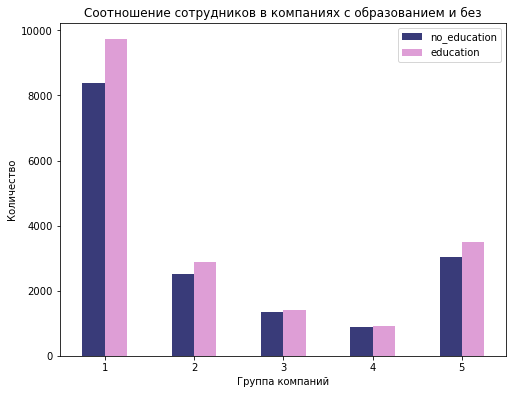

In [145]:
# Строим столбчатую диаграмму
gr.plot(kind='bar',
        figsize=(8,6),
        title='Соотношение сотрудников в компаниях с образованием и без',
        ylabel='Количество',
        xlabel='Группа компаний',
        rot=0,
        legend=True,
        colormap='tab20b')
plt.show()

**Вывод**: Для всех категорий компаний одна тенденция: доля сотрудников без образования чуть меньше, чем доля образованных сотрудников. Делаю вывод, что наличие данных об образовании не зависят от размера компании.

Думаю, что присоединить дополнительно к people_edu датафрейм degrees не получится, т.к. люди учились в нескольких университетах и неизвестно в каком они получили ту или иную специальность. Но можно отдельно соединить people и degrees по столбцу 'people_id', если понадобится.

### Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Согласно ТЗ столбец 'network_username' встречается:
1. в датасете 'company_and_rounds'. В нем он отражает ник компании в сети. 
2. в датасете 'people' — отражает ник человека в социальных сетях.
То есть по заданию - это разная информация.
Но можно немного исследовать, используя множества.

In [146]:
#создаем мнгожество уникальных никнеймов компаний
set_company_nickname = set(company_and_rounds['network_username'])
display(f'Количество уникальных ников компаний: {len(set_company_nickname)}')

'Количество уникальных ников компаний: 79572'

In [147]:
#создаем мнгожество уникальных никнеймов людей
set_people_nickname = set(people['network_username'])
display(f'Количество уникальных ников людей {len(set_people_nickname)}')

'Количество уникальных ников людей 38422'

In [148]:
#создаем мнгожество уникальных никнеймов инв.фондов
set_fund_nickname = set(fund['network_username'])
display(f'Количество уникальных ников фондов {len(set_fund_nickname)}')

'Количество уникальных ников фондов 2099'

In [149]:
#считаем пересечения в множествах
set1 = len(set_company_nickname.intersection(set_people_nickname))
set2 = len(set_fund_nickname.intersection(set_people_nickname))
set3 = len(set_fund_nickname.intersection(set_company_nickname))  

In [150]:
display(f'Количество пересечений в никах Компаний и Людей: {set1}') 
display(f'% между Компании и Люди: Компании - {round((set1/len(set_company_nickname))*100,2)}%, \
Люди - {round((set1/len(set_people_nickname))*100,2)}%')
display(f'Количество пересечений в никах Фондов и Людей: {set2}')
display(f'% между Фонды и Люди: Фонды - {round((set2/len(set_fund_nickname))*100,2)}%, \
Люди - {round((set2/len(set_people_nickname))*100,2)}%')
display(f'Количество пересечений в никах Фондов и Компаний: {set3}')
display(f'% между Фонды и Компании: Фонды - {round((set3/len(set_fund_nickname))*100,2)}%, \
Компании - {round((set3/len(set_company_nickname))*100,2)}%')

'Количество пересечений в никах Компаний и Людей: 2200'

'% между Компании и Люди: Компании - 2.76%, Люди - 5.73%'

'Количество пересечений в никах Фондов и Людей: 80'

'% между Фонды и Люди: Фонды - 3.81%, Люди - 0.21%'

'Количество пересечений в никах Фондов и Компаний: 71'

'% между Фонды и Компании: Фонды - 3.38%, Компании - 0.09%'

Визуализируем пересечения множеств никнеймов на диграмме Венна

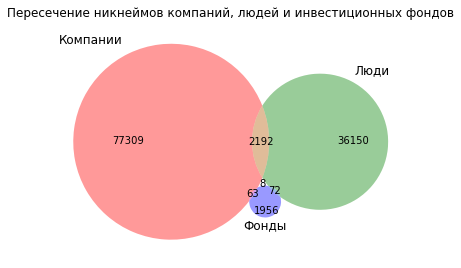

In [151]:
# Строим диаграмму Венна
v = venn3(subsets=[set_company_nickname, set_people_nickname, set_fund_nickname], \
          set_labels=('Компании', 'Люди', 'Фонды'))
plt.title("Пересечение никнеймов компаний, людей и инвестиционных фондов")
plt.show()        

**Вывод:** столбец 'network_username' не может использоваться для связи данных по следующим причинам:
1. по ТЗ в разных датасетах содержит разные данные,
2. не может однозначно идентифицировать ни компанию, ни человека,
3. процент совпадений никнеймов низкий - меньше 10%.


### Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Данные в датафрейме **company_and_rounds** избыточны. Там содержится информация: 
1. о компаниях, которее финансируются, и их раунды финансирования, 
2. о компаниях, которые еще не финансируются и у них нет данных об этапах финансирования.

Можно разделить датафрейм на два: отдельно:
1. компании и общие данные по ее финансированию (**company**),
2. раунды финансирования (**rounds**).
Датафреймы можно будет связать по 'company_id'. 

Попробуем разделить данные и убрать "лишнюю пустоту".
Скорее всего, данные так и хранились, т.к. в первоначальной вресии датафрейма было два столбца с id компании.

In [152]:
#выделяем сведения о компаниях
company=company_and_rounds[['company_id', 'name', 'country_code', 'category_code', 'domain', 'network_username',\
                            'pre_money_valuation', 'funding_total', 'investment_rounds','funding_rounds',\
                             'milestones', 'status', 'founded_at', 'closed_at']]

In [153]:
company.head()

,company_id,name,country_code,category_code,domain,network_username,pre_money_valuation,funding_total,investment_rounds,funding_rounds,milestones,status,founded_at,closed_at
0,1,Wetpaint,USA,web,wetpaint-inc.com,BachelrWetpaint,0.0,39750000.0,0,3,5,operating,2005-10-17,NaT
1,1,Wetpaint,USA,web,wetpaint-inc.com,BachelrWetpaint,0.0,39750000.0,0,3,5,operating,2005-10-17,NaT
2,1,Wetpaint,USA,web,wetpaint-inc.com,BachelrWetpaint,0.0,39750000.0,0,3,5,operating,2005-10-17,NaT
3,10,Flektor,USA,games_video,flektor.com,NaN,NaN,0.0,0,0,0,acquired,NaT,NaT
4,100,There,USA,games_video,there.com,NaN,NaN,0.0,0,0,4,acquired,NaT,NaT


In [154]:
#проверим компании на полные дубли по всем столбцам
display(f'Явных дубликатов по всем столбцам: {company.duplicated().sum()}.\
         Это {round(company.duplicated().sum()/company.shape[0],2)} %')

'Явных дубликатов по всем столбцам: 20898.         Это 0.1 %'

In [155]:
# удалим дубликаты
company = company.drop_duplicates(keep='first', inplace=False) 

In [156]:
#выделяем данные о раундах финансирования
rounds=company_and_rounds[['funding_round_id', 'company_id', 'funded_at', 'funding_round_type', 'raised_amount',\
               'participants','is_first_round', 'is_last_round']]

In [157]:
rounds.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,participants,is_first_round,is_last_round
0,888,1,2005-10-01,series-a,5250000.0,2,False,True
1,889,1,2007-01-01,series-b,9500000.0,3,False,False
2,2312,1,2008-05-19,series-c+,25000000.0,4,True,False
3,0,10,NaT,NaN,NaN,-1,True,True
4,0,100,NaT,NaN,NaN,-1,True,True


In [158]:
#проверим - есть ли суммы с пустым id раунда?
rounds['raised_amount'].loc[rounds['funding_round_id']==0].sum()

np.float64(0.0)

Сумм нет, удаляем строки с id раунда = 0

In [159]:
#удаляем
rounds = rounds.loc[rounds['funding_round_id'] !=0]

In [160]:
#проверим раунды на полные дубли по всем столбцам
display(f'Явных дубликатов по всем столбцам: {rounds.duplicated().sum()}.\
         Это {round(rounds.duplicated().sum()/rounds.shape[0],2)} %')

'Явных дубликатов по всем столбцам: 0.         Это 0.0 %'

In [161]:
display(f'В первоначальном датафрейме "company_and_rounds" было: {company_and_rounds.shape[0]} строк и {company_and_rounds.shape[1]} столбцов')
display('После разделения данных:')
display(f' - в датафрейме "company": {company.shape[0]} строк и {company.shape[1]} столбцов')
display(f' - в датафрейме "rounds": {rounds.shape[0]} строк и {rounds.shape[1]} столбцов')

'В первоначальном датафрейме "company_and_rounds" было: 217470 строк и 21 столбцов'

'После разделения данных:'

' - в датафрейме "company": 196572 строк и 14 столбцов'

' - в датафрейме "rounds": 52626 строк и 8 столбцов'

1. Датафреймы "company" и "rounds" можно связать по столбцу "company_id". 
2. Датафрейм "rounds" можно свзяать с 'investment' по столбцу 'funding_round_id'.
3. Датафрейм "company" можно свзяать с 'investment' по столбцу 'company_id'.

## Исследовательский анализ объединённых таблиц

### Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [162]:
display(f'Количество строк в датафрейме с компаниями "company" {company.shape[0]}')

'Количество строк в датафрейме с компаниями "company" 196572'

In [163]:
#выбираем данные по условию funding_rounds или investment_rounds не нулевые или в статусе указано 'acquired'
df_company = company.loc[(company['funding_rounds'] > 0) | (company['investment_rounds'] > 0) | \
                                (company['status'].str.find('acquired') !=-1)]

In [164]:
display(f'Количество строк в датафрейме "df_company" с отобранными данными" {df_company.shape[0]}')

'Количество строк в датафрейме "df_company" с отобранными данными" 40768'

Проверим датафрейм 'df_company' на пустые значения

In [165]:
#Оценим пропуски в датафрейме df_company 
(pd.DataFrame({'Кол-во пропусков': df_company.isnull().sum(), \
               'Доля пропусков':  df_company.isnull().mean()*100})      
             .sort_values(by='Кол-во пропусков', ascending=False)
             .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
closed_at,38638,94.775314
network_username,19899,48.810341
founded_at,12940,31.740581
pre_money_valuation,9040,22.174254
country_code,6005,14.729690
category_code,5432,13.324176
domain,4993,12.247351
name,0,0.000000
company_id,0,0.000000
funding_total,0,0.000000


Видим, что выбранных данных нет пропусков в интересующих нас столбцах:
- первичный ключ company_id    
- funding_total -  сумма финансирования
- funding_rounds - число раундов финанисрования
- status - статус компании

В столбцах
- founded_at - дата инвестирования - 31%  пропусков
- category code — категория области деятельности компании - 13%


### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [166]:
# настройка вывода чисел не в экспоненциальной форме
#pd.set_option('display.float_format', lambda x: '%.2f' % x) - или так
pd.options.display.float_format = '{:.2f}'.format

In [167]:
# выводим статистику по столбу 
df_company['funding_total'].describe()

count        40768.00
mean      10360954.81
std       60432249.43
min              0.00
25%              0.00
50%         600000.00
75%        5685000.00
max     5700000000.00
Name: funding_total, dtype: float64

Минимальная сумма финансирования - 0.
Максимальная сумма - 5,7 млр.
Видим, что распределение значений суммы финансирования ассиметрично и скошено влево - минимальное значение и 1 квантиль равны и равны = 0.
Разница между медианой -  600000.00 и средним значением= 10360954.81 говорит о большом разбросе.
Стандартное отклонение - 60432249.43 также указывает на то, что данные распределены по большому диапазону значений.


In [168]:
display(f'Типичный размер общего финансирования компании составляет: {df_company["funding_total"].quantile(0.5)}')

'Типичный размер общего финансирования компании составляет: 600000.0'

In [169]:
# посчитаем размах
IQR = df_company['funding_total'].quantile(0.75)-df_company['funding_total'].quantile(0.25)

In [170]:
display(f'Межквартильный размах (средние 50% данных) в сумме общего финансирования - {IQR}')

'Межквартильный размах (средние 50% данных) в сумме общего финансирования - 5685000.0'

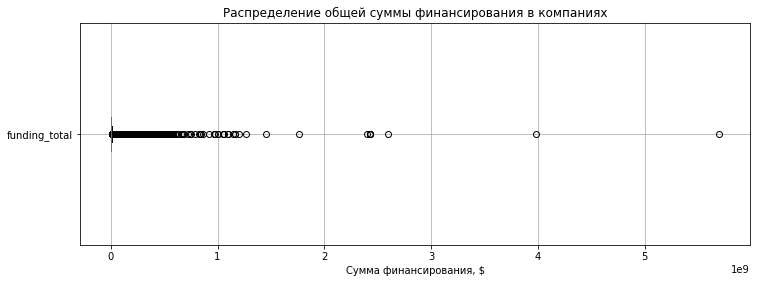

In [171]:
# Визуализируем - строим диаграмму размаха значений в столбце 'funding_total'
plt.figure(figsize=(12,4))
df_company.boxplot(column='funding_total', vert=False)
plt.title('Распределение общей суммы финансирования в компаниях')
plt.xlabel('Сумма финансирования, $')
plt.show() 

В нашем исследовании - большие данные и большой разброс значений, попробуем включить логарифмическую шкалу на оси Х - это удобно при работе с данными, где значения имеют большой разброс — логарифмический масштаб позволяет увидеть детали как на малых, так и на больших значениях и можно отобразить особенности зависимостей, которые не видны в линейном масштабе.

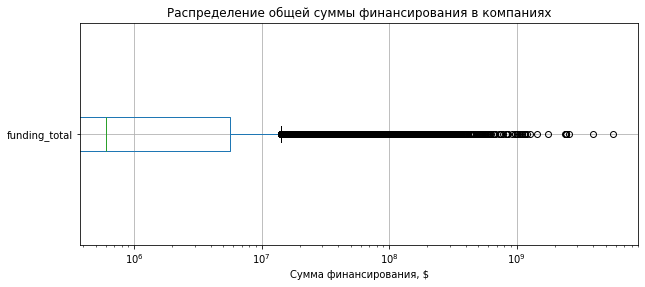

In [172]:
# Строим диаграмму размаха значений в столбце 'funding_total' на логаифмической шкале
plt.figure(figsize=(10,4))
df_company.boxplot(column='funding_total', vert=False)
plt.xscale('log')
plt.title('Распределение общей суммы финансирования в компаниях')
plt.xlabel('Сумма финансирования, $')
plt.show() 

Видим выбивающиесся значения за пределами правого уса - выбросы. Это ~ 12*10^7. Попробуем отключить выбросы на графике, чтобы увидеть ближе типичные значения.

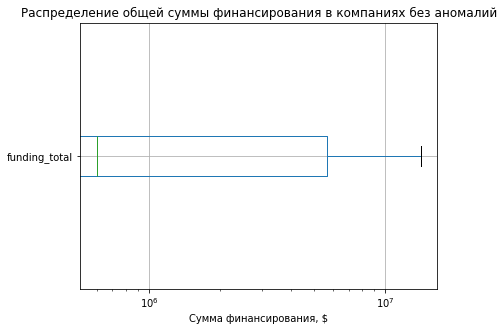

In [173]:
# Строим диаграмму размаха значений в столбце 'funding_total' без выбросов на логарифмической шкале
df_company.boxplot(column='funding_total', vert=False, showfliers=False)
plt.xscale('log')
plt.title('Распределение общей суммы финансирования в компаниях без аномалий')
plt.xlabel('Сумма финансирования, $')
plt.show() 

Построим гистограмму по столбцу 'funding_total' также используя логарифмическую шкалу

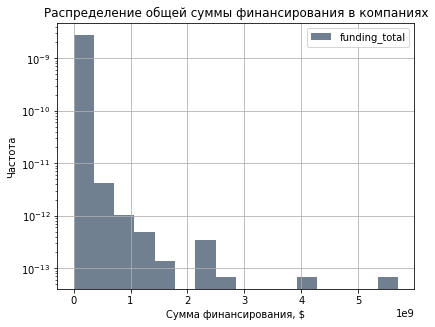

In [174]:
df_company['funding_total'].plot(kind='hist',
                                 log=True,
                                 density=True,
                                 alpha=1,
                                 bins=16,
                                 xlabel='Сумма финансирования, $',
                                 ylabel='Частота',
                                 legend=True,
                                 color='slategray')
plt.title('Распределение общей суммы финансирования в компаниях')
plt.legend()
plt.grid()
plt.show()

На этом графике хорошо видно выбросы - всё, что больше 2 млд.

**Вывод:** 
1. Типичный размер общего финансирования компании составляет: 600000$. 

2. У 50% компаний размер общей суммы финансирования - от 0 до 5685000.00

3. Представленный набор данных имеет широкий диапазон значений - от 0 до 5,7 млрд. 

3. К таким данным обычные способы нахождения типичных значений не подходят. Лучше разбить компании по похожим диапазонам общей суммы финансирования на несколько групп и среди них искать типичные значения, общие признаки и отклонения.


### Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [175]:
#Объединяем датафрейм с покупками компаний 'acquisition' с обработвннм датафрейм с самими компаниями (40-тысячник) inner join
df_task3=pd.merge(left=acquisition, right=df_company, how='inner', left_on='acquired_company_id', right_on='company_id')

In [176]:
display(f'Куплено компаний: {df_task3.shape[0]} строк')

'Куплено компаний: 9400 строк'

In [177]:
# проверим объединенный датафрейм на дубликаты по 'company_id'
display(f'Дубликатов по "company_id": {df_task3["company_id"].duplicated().sum()}')

'Дубликатов по "company_id": 153'

In [178]:
# посмотрим на них
df_task3.loc[df_task3['company_id'].duplicated()].sort_values(by='company_id').head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_id,name,country_code,category_code,domain,network_username,pre_money_valuation,funding_total,investment_rounds,funding_rounds,milestones,status,founded_at,closed_at
7146,7954,687,9,NaN,0.00,2012-11-28,9,Geni,USA,web,geni.com,geni,0.00,16500000.00,0,3,4,acquired,2006-06-01,NaT
7145,7954,687,9,NaN,0.00,2012-11-28,9,Geni,USA,web,geni.com,geni,100000000.00,16500000.00,0,3,4,acquired,2006-06-01,NaT
5432,5984,13,13,NaN,29000000.00,2009-04-01,13,StumbleUpon,USA,web,stumbleupon.com,stumbleupon,0.00,18500000.00,0,4,5,acquired,2002-02-01,NaT
5278,5806,20,62,NaN,2600000000.00,2005-09-12,62,Skype,LUX,software,skype.com,skype,0.00,76805000.00,3,5,6,acquired,2003-08-01,NaT
7759,8668,74819,75,NaN,0.00,2011-04-27,75,delicious,USA,web,delicious.com,Delicious,0.00,0.00,0,1,6,acquired,2003-09-01,NaT


In [179]:
# выбираем дублирующиеся компании "на посмотреть 'company_id'=[763, 629, 596, 445,75,13] 
df_task3.loc[df_task3['company_id'] == 763].head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_id,name,country_code,category_code,domain,network_username,pre_money_valuation,funding_total,investment_rounds,funding_rounds,milestones,status,founded_at,closed_at
5756,6368,5487,763,cash_and_stock,0.00,2011-11-11,763,WooMe,USA,web,woome.com,woome,4700000.00,17400000.00,0,3,3,acquired,2000-12-01,NaT
5757,6368,5487,763,cash_and_stock,0.00,2011-11-11,763,WooMe,USA,web,woome.com,woome,0.00,17400000.00,0,3,3,acquired,2000-12-01,NaT
5758,6368,5487,763,cash_and_stock,0.00,2011-11-11,763,WooMe,USA,web,woome.com,woome,18000000.00,17400000.00,0,3,3,acquired,2000-12-01,NaT


Дополнительный анализ выборок из объединенного датафрейма по 'company_id'=[763, 629, 596, 445] показал, что дублированние произошло по следующим причинам: 
1. Предварительную оценку стартапов проводили разные компании, соответственно, записи различаются столбцами 'pre_money_valuation' и 'acquiring_company_id', столбец 'funding_total' - одинаковый
2. Или одна и та же покупающая компания по-разному оценила стартап и записи различаются только в 'pre_money_valuation'.
3. Или в покупке участвовали несколько компаний, тогда различия в столбце 'price_amount'.

Данные в столбце 'funding_total' (общая сумма) - дублируются и влияют на средние показатели. Поэтому можно просто удалить дублирующиеся строки, не сохраняя отсальные данные, т.к. в данном конкретном исследовании нас интересует только этот столбец.

In [180]:
df_task3 = df_task3.drop_duplicates(subset='company_id', keep='first')

In [181]:
display(f'Куплено компаний (после удаления дубликатов): {df_task3.shape[0]} строк')

'Куплено компаний (после удаления дубликатов): 9247 строк'

In [182]:
#выбираем купленные копании за 0 и 1 при ненулевой первоначальной стоимости
df_task3 = df_task3.loc[((df_task3['price_amount'] == 1) | (df_task3['price_amount'] == 0)) & 
                   (df_task3['funding_total'] > 0)]

In [183]:
display(f'Компаний, купленных за 1 и 0 при ненулевой первоначальной стоимости {df_task3.shape[0]} ')

'Компаний, купленных за 1 и 0 при ненулевой первоначальной стоимости 1584 '

In [184]:
# посмотрим, какие это компании по категориям
(pd.DataFrame({'Категория компании': df_task3.groupby('category_code')['acquired_company_id'].count(), \
               'Доля, %': round((df_task3.groupby('category_code')['acquired_company_id'].count()/df_task3.shape[0])*100,2)})      
             .sort_values(by='Категория компании', ascending=False)
             .style.background_gradient(cmap='coolwarm'))

,Категория компании,"Доля, %"
category_code,,
software,360,22.730000
web,207,13.070000
enterprise,127,8.020000
mobile,114,7.200000
games_video,75,4.730000
advertising,74,4.670000
biotech,68,4.290000
ecommerce,56,3.540000
network_hosting,54,3.410000


В топе-4 3 компании относятся к технологиям - программное обеспечение - 22,7%, web - 13,07%, mobile - 7,2%. Но есть и конкретные предприятия - enterprise - 8,02%.

In [185]:
#исследуем общую сумму финансирования таких компаний - получим статистику по столбцу
df_task3['funding_total'].describe()

count         1584.00
mean      17859642.59
std      145666041.64
min           3750.00
25%        2000000.00
50%        6000000.00
75%       15400000.00
max     5700000000.00
Name: funding_total, dtype: float64

Для оценки выбросов сравниваем среднее значение с медианой:
    
    среднее - 18146300.75
    медиана - 6000500.00
    
Среднее сильно больше медианы, значит много выбросов данных справа. Рассчитаем границы выбросов.   

In [186]:
# Вычисляем квартили Q1 и Q3
Q1 = df_task3['funding_total'].quantile(0.25)
Q3 = df_task3['funding_total'].quantile(0.75)

In [187]:
# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1
display(f'Межквартильный размах {IQR}')      

'Межквартильный размах 13400000.0'

In [188]:
# Определяем верхний порог для выбросов
upper_bound = Q3 + 1.5 * IQR
display(f'Верхний порог для выбросов {upper_bound}')  

'Верхний порог для выбросов 35500000.0'

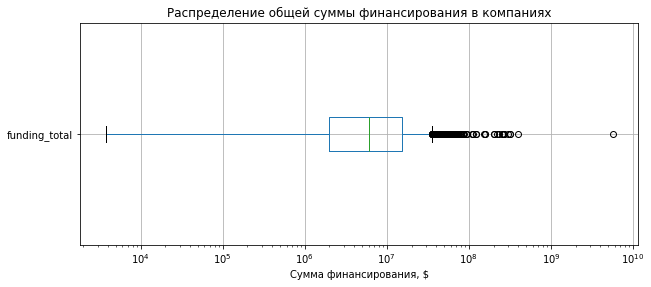

In [189]:
# Строим диаграмму размаха значений в столбце 'funding_total' на логаифмической шкале с выбросами
plt.figure(figsize=(10,4))
df_task3.boxplot(column='funding_total', vert=False)
plt.xscale('log')
plt.title('Распределение общей суммы финансирования в компаниях')
plt.xlabel('Сумма финансирования, $')
plt.show() 

На этой визуализации хорошо видно выбросы справа, а на визуализации ниже - хорошо видно значение для порога верхних выбросов в районе 36 млн.

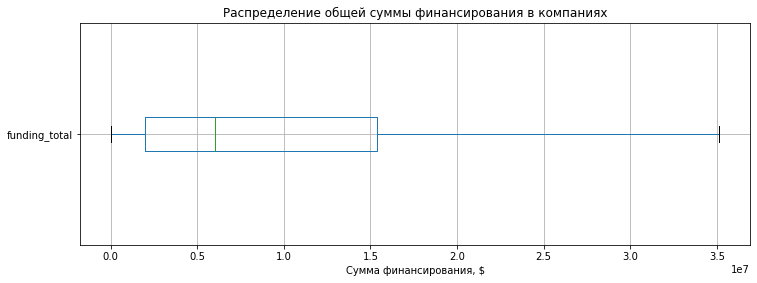

In [190]:
# Строим диаграмму размаха в столбце 'funding_total' без выбросов
plt.figure(figsize=(12,4))
df_task3.boxplot(column='funding_total', vert=False, showfliers=False)
plt.title('Распределение общей суммы финансирования в компаниях')
plt.xlabel('Сумма финансирования, $')
plt.show() 

Рассчитаем процентиль для границы верхних выбросов. Напишем функцию для расчета этого значения.

In [191]:
def count_percentile(df, column, value,first_percentile):
    ''' Функция принимает на вход df - датафрейм, 
                                  column - колонку, по которой считаем перцентиль,
                                  value - значение, для которого вычисляем
                                  first_percentile - с какого перцентиля начать
        В цикле до 100% расчитывается значение перцентиля с шагом 0.1
        Функция возвращает значение рассчитанного перцентиля  или 100, если значение больше макисмума'''
    for count_percentile in range(first_percentile,100):
        if np.percentile(df[column],count_percentile) < value: 
            count_percentile = count_percentile + 0.1
        else: return count_percentile
    return 100

In [192]:
display(f'Перцентиль для границы верхних выбросов общей суммы финансирования "funding_total" компаний за 0 или 1: \
{count_percentile(df_task3,"funding_total", 36405500.0, 76)}')

'Перцентиль для границы верхних выбросов общей суммы финансирования "funding_total" компаний за 0 или 1: 92'

Нижней границы выбросов у данном случае быть не может, т.к. наблюдаемый минимум = 0 (компании покупаются за 0$), а отрицательных значений суммы при покупке не бывает.

**Вывод:** в топе-4 компаний, купленных на 0 или 1 доллар - компании, относящиеся к компьютерным и мобильным технологиям, Но есть и конкретные предприятия - enterprise - 8,7% от таких компаний.

Средняя общая стоимость таких компаний - 6000500.00$. 

Верхняя граница выбросов -  36405500.0, что соответствует 92 перцентилю. Нижней границы выбросов нет.



### Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [193]:
#Объединяем датафрейм с покупками компаний 'acquisition' с обработвннм датафрейм с самими компаниями (40-тысячник) inner join
df_task4=pd.merge(left=acquisition, right=df_company, how='inner', left_on='acquired_company_id', right_on='company_id')

Мы уже проверяли объедимненный датафрейм на дубликаты по 'company_id' в п.3.3. В данном случае исследуем столбец 'price_amount', который для дублированных строк содержит разные суммы для разных покупающих компаний. Удалять дубли не нужно.

In [194]:
display(f'Куплено компаний: {df_task4.shape[0]} строк')

'Куплено компаний: 9400 строк'

Сгруппируем компании по столбцу 'category_code' (категория области деятельности компании) и посчитаем для каждой категории статистику по столбцу общей суммы покупки 'funding_total'

In [195]:
#считаем max, среднее, медиану и стандартное отклонение
df_task4 = df_task4.groupby('category_code')['price_amount'].agg(['max','mean','median','std'])

In [196]:
#Отсортируем по убыванию медианы 
df_task4 = df_task4.sort_values(by='median', ascending=False)

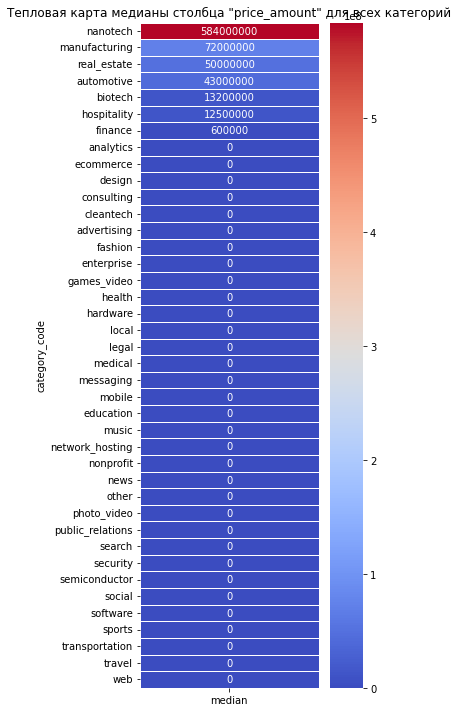

In [197]:
# Визуализируем значения медианы столбца 'price_amount' на тепловой карте для всех категорий
plt.figure(figsize=(4,12))
sns.heatmap(df_task4[['median']], annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title('Тепловая карта медианы столбца "price_amount" для всех категорий')
plt.show()

Видим, что покупаются за деньги компании только 7 категорий. Остальные - за 0$ (либо не покупаются).

In [198]:
#выбираем топ-7
df_median = df_task4.head(7)

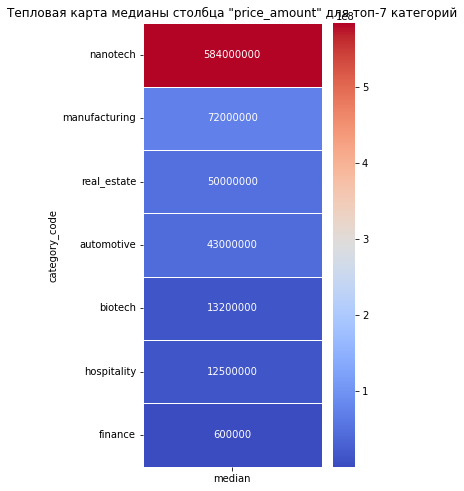

In [199]:
# Визуализируем значения медианы столбца 'funding_total' на тепловой карте для топ-7
plt.figure(figsize=(4,8))
sns.heatmap(df_median[['median']], annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title('Тепловая карта медианы столбца "price_amount" для топ-7 категорий')
plt.show()

Получили категории  стартапов с типично высокими ценами покупки. Можно выбрать интересующие.

In [200]:
#Отсортируем по убыванию стандартного отклонения цены 
df_task4 = df_task4.sort_values(by='std', ascending=False)

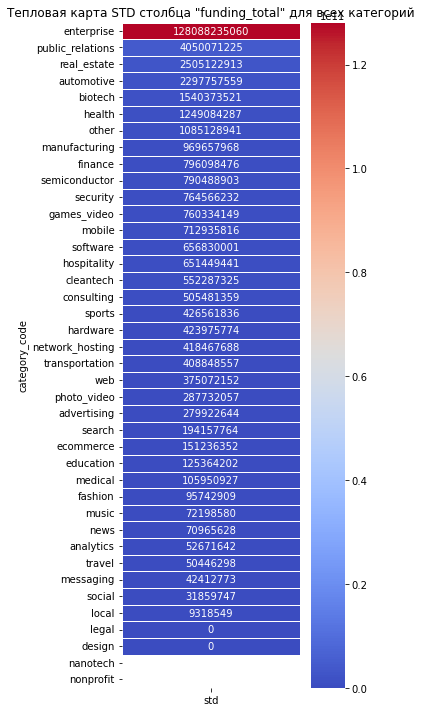

In [201]:
# Визуализируем значения стандартного отклонения столбца 'funding_total' на тепловой карте для всех категорий
plt.figure(figsize=(4,12))
sns.heatmap(df_task4[['std']], annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title('Тепловая карта STD столбца "funding_total" для всех категорий')
plt.show()

Получили категории стартапов с наибольшим разбросом цен за стартап. Можно выбрать интересующие категории.

### Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

Выведем уникальные значения статусов датафрейма из п.3.1.

In [202]:
df_company['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

Исследуем значения столбца 'funding_rounds' - выедем его уникальные значения.

In [203]:
df_company['funding_rounds'].unique()

array([ 3,  0,  1,  5,  2,  7,  4,  6,  8, 10,  9, 13, 11, 15, 14, 12])

Отберем только те компании, у которых ненулевая общая стоимость покупки 'funding_total'.

In [204]:
#отбираем с ненулевой суммой
df_task5 = df_company.loc[df_company['funding_total'] > 0]

In [205]:
# группируем по статусу и вычисляем медиану 
display('Среднее значение количества раундов для каждого возможного статуса стартапа:')
display(df_task5.groupby('status')['funding_rounds'].mean().head())
display('Медиана количества раундов для каждого возможного статуса стартапа:')
display(df_task5.groupby('status')['funding_rounds'].median().head())

'Среднее значение количества раундов для каждого возможного статуса стартапа:'

status
acquired    1.98
closed      1.45
ipo         2.62
operating   1.72
Name: funding_rounds, dtype: float64

'Медиана количества раундов для каждого возможного статуса стартапа:'

status
acquired    2.00
closed      1.00
ipo         2.00
operating   1.00
Name: funding_rounds, dtype: float64

По разнице между медианой и средним арифметическим - можно определить для какого статуса стартапа и в какую сторону сдвинуто распределение. 

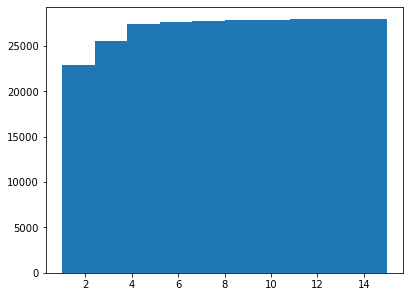

In [206]:
data = df_task5['funding_rounds']
fig, ax = plt.subplots()
ax.hist(data, density=False, cumulative=True)

plt.show()

In [207]:
# Для визуализации сгруппируем компании по категории и посчитаем среднее значение
df5 = pd.pivot_table(df_task5, index=['category_code'], values='funding_rounds', aggfunc='mean')

In [208]:
#сортируем
df5 = df5.sort_values(by='funding_rounds', ascending=False)

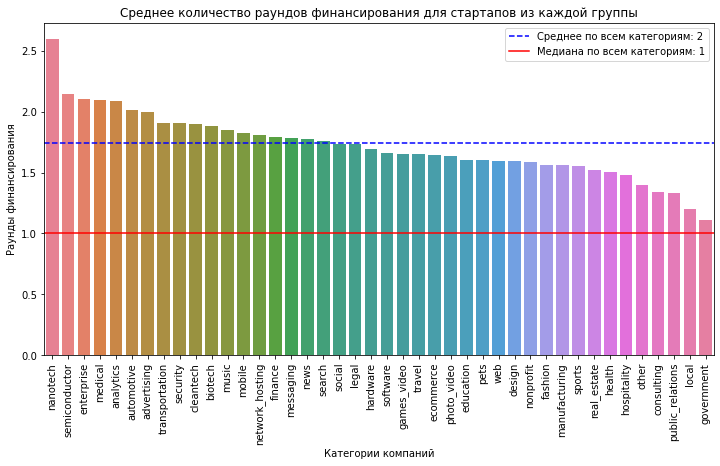

In [209]:
#Расчет средней и медианы по всем категориям компаний
mean_funding_rounds = df_task5['funding_rounds'].mean()
median_funding_rounds = df_task5['funding_rounds'].median()

#сброс индекса для того, чтобы по столбцу построить график
df5=df5.reset_index()
# Построим график
plt.figure(figsize=(12, 6))
sns.barplot(data=df5, x='category_code', y='funding_rounds', hue='category_code')
#повернем подписи на оси x, т.к. не умещаются по горизонтали
plt.xticks(rotation=90)
# Добавление линий среднего и медианы
plt.axhline(mean_funding_rounds, color="blue", linestyle="--", label=f'Среднее по всем категориям: {mean_funding_rounds:.0f}')
plt.axhline(median_funding_rounds,color="red",linestyle="-", label=f'Медиана по всем категориям: {median_funding_rounds:.0f}')
plt.legend()
plt.title('Среднее количество раундов финансирования для стартапов из каждой группы' )
plt.xlabel('Категории компаний')
plt.ylabel('Раунды финансирования')
plt.show()

На графике видно, что категория "нанотехнологии" отличается от остальных категорий по среднему количеству раундов стартапа. Это говорит о том, что:
1. для развития компании требуются значительные финансовые средства
2. высокие риски, и чтобы снизить риски для инвесторов, следующий раунд финансирования наступает, как правило, только после того, как компания успешно справилась с предыдущими задачами.
3. на каждом новом раунде компания привлекает  новые денежные средства, и, возможно, новых инвесторов.

По визуализации можно отобрать нужные категории стартапов.

## Итоговый вывод и рекомендации

В проекте **"Исследование рынка стартапов"** проделана следующая работа:

1. **Выгружены** данные из файлов и загружены в одноименные датафреймы:
    - 'acquisition.csv'
    - 'company_and_rounds.csv'
    - 'education.csv'
    - 'people.csv'
    - 'degrees.csv'
    - 'fund.csv'
    - 'investment.csv'


2. На этапе **предобработки**: 
    - наименования столбцов датафреймов проверены или приведены к стилю snake case
    - для связности данных переименован столбец 
    - данные в датафреймах преобразованы в нужные типы 
    - данные проверены на пропуски
    - удалены пустые строки
    - удалены дублирующиеся столбец и строки
    - данные проверены на явные и неявные дубликаты
        

3. Данные **проанализированы**: 
    - acquisition - первичный ключ 'id'
    - company_and_rounds - первичный ключ - комбинация 'company_id'+'funding_round_id' 
    - people - первичный ключ - комбинация 'people_id'+'company_id'.
    - education - первичный ключ - 'id'
    - degrees - первичный ключ - 'id'
    - fund - первичный ключ 'id'
    - investment - первичный ключ 'id.


4. Проверена **связность данных** на предмет объединения
    - Датафрейм 'acquisition' связан с 'company_and_rounds' по столбцам: 'acquired_company_id' - 'company_id' соответственно.
    - Датафрейм 'people' связан с 'education' по столбцу 'people_id'
    - Датафрейм 'people' связан с 'company_and_rounds' по столбцу 'company_id'
    - Датафрейм 'degrees' связан с 'people' по столбцу 'people_id'
    - Датафрейм 'investment' связан с 'company_and_rounds' по столбцу 'company_id'
    - Датафрейм 'fund' связан с 'acquisition' по столбцу 
        

5. Анализ датасета 'company_and_rounds' - корреляция пропусков и похожие закономерности отсутствия значений говорят о том, что, скорее всего, до объединения, данные хранились в 3-х датасетах. Это позволяет **разбить** 'company_and_rounds' на 2 датасета - 'company' (первичный ключ 'company_id') и 'rounds' (первичный ключ 'funding_round_id') связанные по столбцу 'company_id'.


6. На основе датафрейма 'company_and_rounds' составлена сводная таблица по годам, с типичными суммой и количеством раундов за год. Построен график .
    **Вывод:**  Типичный размер, собранных в рамках одного раунда средств, был максимален в 2005 году. В 2013 году наметился рост суммы, выделенной в рамках 1 раунда, после минимума в 2012 году. В 2013 году было 11042 платежей, типичная сумма раунда (медиана) - 1200000 $.
    
    
7. Информация **об образовании сотрудников** не полна - только у 19,3% сотрудников из 'people' есть сведения о том, в какой компании они работают.

    Компании были разделены по количеству сотрудников на 5 групп. Для каждой группы проанализирована полнота сведений о наличии образования. **Вывод:** наличие сведений об образовании не зависит от размера компании. 

    Связывать 'people' 'education' и 'degrees' не имееет смысла из-за неполноты сведений в 'degrees', но можно отдельно соединить 'people' и 'degrees' по столбцу 'people_id'.


8. Для объединения данных столбец **'network_username'**  не подходит 
    - в разных датасетах содержит разные данные,
    - не может однозначно идентифицировать ни компанию, ни человека,
    - процент совпадений никнеймов низкий - меньше 10%. Возможно, что эти совпадения случайны.


9. Для **исследовательского анализа** выбраны данные из датафрейма 'company_and_rounds' компании, у которых 'funding_rounds' или 'investment_rounds' больше нуля, или те, у которых в колонке 'status' указано 'acquired'


10. Анализ **типичного размера средств**, который предоставлялся компаниям.
    
    **Вывод:**    
    - Типичный размер общего финансирования компании составляет: 600000$.
    - У 50% компаний размер общей суммы финансирования - от 0 до 5685000.00
    - Представленный набор данных имеет широкий диапазон значений - от 0 до 5,7 млрд.

    К таким данным обычные способы нахождения типичных значений не подходят. Лучше разбить компании по похожим диапазонам общей суммы финансирования на несколько групп и среди них искать типичные значения, общие признаки и отклонения.


11. Исследование **покупки за ноль или за один доллар** и ненулевой общий объём финансирования.

    **Вывод:**
    - в топе-4 компаний, купленных на 0 или 1 доллар - компании, относящиеся к компьютерным и мобильным технологиям, Но есть и конкретные предприятия - enterprise - 8,02% от таких компаний. Больше всего - 22,7% - программное обеспечение.
    - Средняя общая стоимость таких компаний - 6000500.00$. 
    - Верхняя граница выбросов общей суммы -  36405500.0, что соответствует 92 перцентилю. Нижней границы выбросов нет.

12. Анализ **цен стартапов по категориям**.

    **Вывод:** 
    - получены 7 категорий компаний с типично высокими ценами
    - получен список компаний с высоким разбросом цены (стандартное отклонение)
    - можно выбрать инетерсующие категории.
    

13. Исследование **"Сколько раундов продержится стартап перед покупкой"**

    **Вывод:** Среднее значение количества раундов для каждого возможного статуса стартапа:
       
       - acquired    1.98
       - closed      1.45
       - ipo         2.62
       - operating   1.72
        
        Построена визуализация "Среднее количество раундов финансирования для стартапов из каждой группы", по которой можно отобрать интересующую категорию.
    Самое большое ср. количество раундов финансирования >2,5 у категории "нанотехнологии". 
    Это связано:
    - С большим объемом вливаемых средств
    - Высокими рисками для инвесторов, для снижения которых следующий раунд наступает после достижения предыдущих целей
    - На каждом этапе привлекаются новые средства и инвесторы.    


**Рекомендация:** 
1. для покупки стартапа рекомендуется компания с типичной суммой финансирования 600000$
2. если финансовая компания обладает необходимыми средствами, то по признаку высокая типичная цена - категория "нанотехнологии", с количеством раундов финансирования выше среднего, когда требуются новые денежные вливания в компанию, т.е. потенциально готовые продаться. 